In [1]:
!ls

Untitled.ipynb         WeatherPyStarter.ipynb api_keys.py
WeatherPy.ipynb        __pycache__


In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['hobart', 'havelock', 'atuona', 'vao', 'codrington', 'malpe', 'ushuaia', 'san pedro', 'cape town', 'mataura', 'abalak', 'torbay', 'puerto ayora', 'hamilton', 'new norfolk', 'algiers', 'barentsburg', 'touros', 'sentyabrskiy', 'rio grande', 'shatrovo', 'pevek', 'busselton', 'huarmey', 'victoria', 'punta arenas', 'longyearbyen', 'ponta do sol', 'manggar', 'nome', 'rikitea', 'bengkulu', 'waddan', 'bimbo', 'dikson', 'taltal', 'morant bay', 'ribeira grande', 'yellowknife', 'barrow', 'saskylakh', 'omsukchan', 'saint-philippe', 'hithadhoo', 'thompson', 'general roca', 'okha', 'tiksi', 'kucevo', 'torata', 'yokadouma', 'kaitangata', 'tasiilaq', 'dunedin', 'pergamino', 'cidreira', 'east london', 'sao joao da barra', 'muros', 'gobindapur', 'san rafael del sur', 'pisco', 'darnah', 'laguna', 'tepetzintla', 'jamestown', 'takoradi', 'upernavik', 'illoqqortoormiut', 'khatanga', 'arraial do cabo', 'lolua', 'qaanaaq', 'georgetown', 'midland', 'port keats', 'benghazi', 'port alfred', 'port hardy', 'uwayl

In [11]:
#run a test api call for a single city and print the json response
testurl = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

testresponse = requests.get(testurl + "london" + key + units).json()
pprint(testresponse)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1627148111,
 'id': 2643743,
 'main': {'feels_like': 72.03,
          'humidity': 76,
          'pressure': 1007,
          'temp': 71.6,
          'temp_max': 74.91,
          'temp_min': 67.55},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2006068,
         'sunrise': 1627099957,
         'sunset': 1627156865,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 10.36}}


In [5]:
print(testresponse['name'].replace("C",""))


KeyError: 'name'

In [12]:
cities_url = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

city_count = 0

for city in cities:
    try:
        wresponse = requests.get(cities_url + city + key + units).json()
        City.append(wresponse['name'])
        Lat.append(wresponse['coord']['lat'])
        Lng.append(wresponse['coord']['lon'])
        Max_Temp.append(wresponse['main']['temp_max'])
        Humidity.append(wresponse['main']['humidity'])
        Cloudiness.append(wresponse['clouds']['all'])
        Wind_Speed.append(wresponse['wind']['speed'])
        Country.append(wresponse['sys']['country'])
        Date.append(wresponse['dt'])
        city_count +=1
        print(f"Processing Record {city_count} for {city}")
    except:
        print("City not found. Skipping.")

Processing Record 1 for hobart
Processing Record 2 for havelock
Processing Record 3 for atuona
Processing Record 4 for vao
Processing Record 5 for codrington
Processing Record 6 for malpe
Processing Record 7 for ushuaia
Processing Record 8 for san pedro
Processing Record 9 for cape town
Processing Record 10 for mataura
Processing Record 11 for abalak
Processing Record 12 for torbay
Processing Record 13 for puerto ayora
Processing Record 14 for hamilton
Processing Record 15 for new norfolk
Processing Record 16 for algiers
City not found. Skipping.
Processing Record 17 for touros
City not found. Skipping.
Processing Record 18 for rio grande
Processing Record 19 for shatrovo
Processing Record 20 for pevek
Processing Record 21 for busselton
Processing Record 22 for huarmey
Processing Record 23 for victoria
Processing Record 24 for punta arenas
Processing Record 25 for longyearbyen
Processing Record 26 for ponta do sol
Processing Record 27 for manggar
Processing Record 28 for nome
Processin

In [13]:
# confirm appropriate number of records collects
len(City)

544

In [ ]:
print(City)

In [14]:
#create a dataframe from the collected data

weather_df = pd.DataFrame({"City":City, "Lat":Lat,"Lng":Lng, "Max Temp":Max_Temp,
                           "Humidity":Humidity, "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed,
                           "Country" : Country, "Date": Date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,44.92,77,99,1.99,AU,1627148245
1,Havelock,34.8791,-76.9013,86.99,58,1,5.99,US,1627148245
2,Atuona,-9.8000,-139.0333,77.97,70,96,16.20,PF,1627147805
3,Vao,-22.6667,167.4833,70.81,84,19,5.68,NC,1627147805
4,Codrington,-38.2667,141.9667,44.98,76,99,23.40,AU,1627147806


In [19]:
# write the data to a csv file and store it in the output folder
weather_csv = weather_df.copy()

weather_csv.to_csv(r'../output_data/cities.csv')

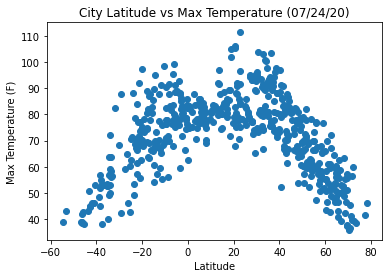

In [36]:
#create a scatter plot of latitude vs temperature

plt.scatter(weather_df["Lat"],weather_df["Max Temp"])

plt.title("City Latitude vs Max Temperature (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('lat_vs_temp.png')
plt.show()

In [30]:
# The above scatter plot show the relationship between a city's latitude and its max temperature on 07/24/21.
# As can be seen, latitudes further from zero tend to have lower max temperatures on this date.

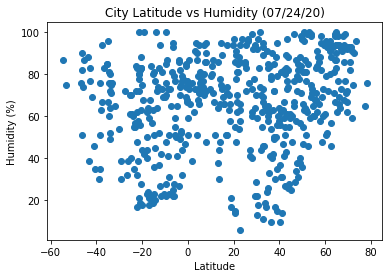

In [37]:
# create a scatter plot of latitude vs humidity
plt.scatter(weather_df["Lat"],weather_df["Humidity"])

plt.title("City Latitude vs Humidity (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('lat_vs_humidity.png')
plt.show()

In [31]:
# The above scatter plot shows the relationship between a city's latitude and its humidity on 07/24/21
# There appears to be no significant correlation between the two on this date.


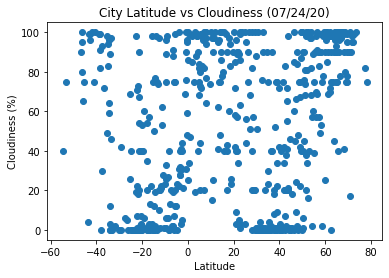

In [39]:
#create a scatter plot of latitude vs cloudiness

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])

plt.title("City Latitude vs Cloudiness (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('lat_vs_cloudiness.png')
plt.show()

In [33]:
# The above scatter plot show the relationship between a city's latitude and its humidity on 07/24/21
# There does not appear to be a significant correlation, howevever the data seems to fall more at high or low degrees of cloudiness
# than at more moderate degrees of cloudiness

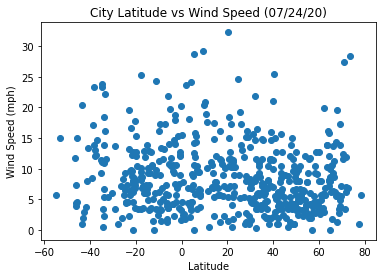

In [41]:
#create a scatter plot of latitude vs wind speed

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])

plt.title("City Latitude vs Wind Speed (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('lat_vs_wind.png')
plt.show()

In [35]:
# The above scatter plot show the relationship between a city's latitude and its wind speed on 07/24/21
# There does not appear to be a particularly significant correlation between the two on this date

In [47]:
#create separate dataframes for Northern and Southern hemisphere

north_df = weather_df.loc[weather_df['Lat'] > 0]
north_df

south_df = weather_df.loc[weather_df['Lat'] < 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,44.92,77,99,1.99,AU,1627148245
2,Atuona,-9.8000,-139.0333,77.97,70,96,16.20,PF,1627147805
3,Vao,-22.6667,167.4833,70.81,84,19,5.68,NC,1627147805
4,Codrington,-38.2667,141.9667,44.98,76,99,23.40,AU,1627147806
6,Ushuaia,-54.8000,-68.3000,38.82,87,40,5.75,AR,1627147806
...,...,...,...,...,...,...,...,...,...
518,Sambava,-14.2667,50.1667,68.72,77,19,12.84,MG,1627147940
519,Booué,-0.0921,11.9385,83.34,51,86,3.27,GA,1627147943
526,Nampula,-15.1165,39.2666,66.15,63,75,13.80,MZ,1627147945
538,Tshikapa,-6.4167,20.8000,83.53,25,19,3.91,CD,1627147949


In [58]:
#calculate linear regression for temperature vs latitude for only Northern Hemisphere cities
nt_pearson = st.pearsonr(north_df["Lat"],north_df["Max Temp"])
print(f"For Nothern Hemisphere Latitude vs Temperature the Pearson r value is {nt_pearson[0]} and the Pearson p value is {nt_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Max Temp"])

nt_regress_values = (north_df["Lat"] * slope + intercept)

nt_regress_values

For Nothern Hemisphere Latitude vs Temperature the Pearson r value is -0.681726129746828 and the Pearson p value is 8.484624952213e-51


1      75.414837
5      86.379681
7      85.870378
10     63.573788
11     68.902120
         ...    
537    86.173973
539    75.427112
541    63.802058
542    64.480094
543    92.289077
Name: Lat, Length: 362, dtype: float64

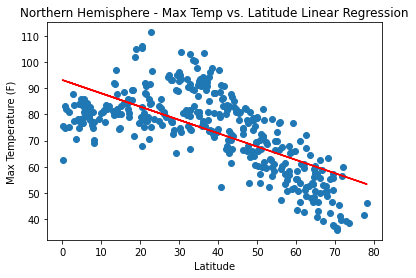

In [57]:
#create a Latutide vs Temperature scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nt_regress_values, "r-")
plt.savefig('north_temp_regression.png')
plt.show()



In [59]:
#calculate linear regression for temperature vs latitude for only Southern Hemisphere cities
st_pearson = st.pearsonr(south_df["Lat"],south_df["Max Temp"])
print(f"For Southern Hemisphere Latitude vs Temperature the Pearson r value is {nt_pearson[0]} and the Pearson p value is {nt_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Max Temp"])

st_regress_values = (south_df["Lat"] * slope + intercept)

st_regress_values

For Southern Hemisphere Latitude vs Temperature the Pearson r value is -0.681726129746828 and the Pearson p value is 8.484624952213e-51


0      49.049573
2      77.373018
3      66.356214
4      52.999087
6      38.842845
         ...    
518    73.548513
519    85.685175
526    72.820892
538    80.269888
540    76.263006
Name: Lat, Length: 182, dtype: float64

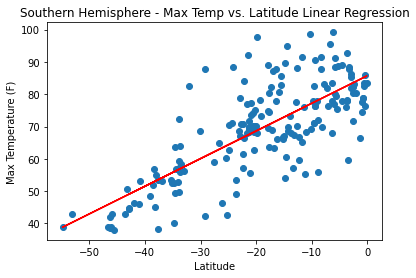

In [64]:
#create a Latutide vs Temperature scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], st_regress_values, "r-")
plt.savefig('south_temp_regression.png')
plt.show()


In [61]:
# The above scatter plots with linear regression show the relationship between temperature and distance from the equator.
# For cities in both hemispheres, the linear regression shows that there is a negative correlation between distance from the equator and temperature.

In [62]:
#calculate linear regression for humidity vs latitude for only Northern Hemisphere cities
nh_pearson = st.pearsonr(north_df["Lat"],north_df["Humidity"])
print(f"For Nothern Hemisphere Latitude vs Humidity the Pearson r value is {nh_pearson[0]} and the Pearson p value is {nh_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Humidity"])

nh_regress_values = (north_df["Lat"] * slope + intercept)

nh_regress_values

For Nothern Hemisphere Latitude vs Humidity the Pearson r value is 0.1405408621698262 and the Pearson p value is 0.007405697544832004


1      68.964801
5      65.679936
7      65.832514
10     72.512161
11     70.915891
         ...    
537    65.741562
539    68.961124
541    72.443775
542    72.240648
543    63.909590
Name: Lat, Length: 362, dtype: float64

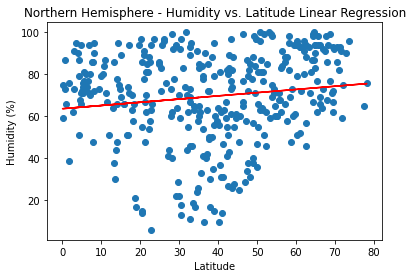

In [63]:
#create a Latutide vs Humidity scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nh_regress_values, "r-")
plt.savefig('north_humid_regression.png')
plt.show()

In [68]:
#calculate linear regression for humidity vs latitude for only Southern Hemisphere cities
sh_pearson = st.pearsonr(south_df["Lat"],south_df["Humidity"])
print(f"For Southern Hemisphere Latitude vs Humidity the Pearson r value is {sh_pearson[0]} and the Pearson p value is {sh_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Humidity"])

sh_regress_values = (south_df["Lat"] * slope + intercept)

sh_regress_values

For Southern Hemisphere Latitude vs Humidity the Pearson r value is -0.12032928866471725 and the Pearson p value is 0.10565596915651178


0      65.282067
2      58.456039
3      61.111119
4      64.330224
6      67.741917
         ...    
518    59.377755
519    56.452786
526    59.553114
538    57.757885
540    58.723555
Name: Lat, Length: 182, dtype: float64

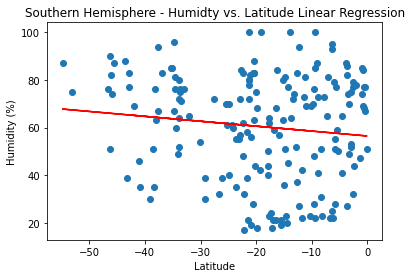

In [69]:
#create a Latutide vs Humidity scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidty vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sh_regress_values, "r-")
plt.savefig('south_humid_regression.png')
plt.show()

In [67]:
# The above linear regressions show that there is not a strong correlation between latitude and humidity for either the Northern hemisphere
# or the Southern hemisphere.

In [70]:
#calculate linear regression for cloudiness vs latitude for only Northern Hemisphere cities
nc_pearson = st.pearsonr(north_df["Lat"],north_df["Cloudiness"])
print(f"For Nothern Hemisphere Latitude vs Cloudiness the Pearson r value is {nc_pearson[0]} and the Pearson p value is {nc_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Cloudiness"])

nc_regress_values = (north_df["Lat"] * slope + intercept)

nc_regress_values

For Nothern Hemisphere Latitude vs Cloudiness the Pearson r value is 0.08133005680200557 and the Pearson p value is 0.12243872032376597


1      57.013858
5      53.707276
7      53.860863
10     60.584671
11     58.977847
         ...    
537    53.769310
539    57.010157
541    60.515833
542    60.311363
543    51.925226
Name: Lat, Length: 362, dtype: float64

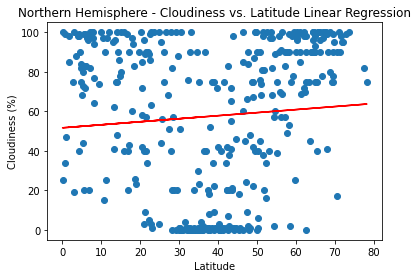

In [71]:
#create a Latutide vs Humidity scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nc_regress_values, "r-")
plt.savefig('north_cloud_regression.png')
plt.show()

In [72]:
#calculate linear regression for cloudiness vs latitude for only Southern Hemisphere cities
sc_pearson = st.pearsonr(south_df["Lat"],south_df["Cloudiness"])
print(f"For Southern Hemisphere Latitude vs Cloudiness the Pearson r value is {sc_pearson[0]} and the Pearson p value is {sc_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Cloudiness"])

sc_regress_values = (south_df["Lat"] * slope + intercept)

sc_regress_values

For Southern Hemisphere Latitude vs Cloudiness the Pearson r value is -0.2021735193715434 and the Pearson p value is 0.006200230813112884


0      52.163417
2      33.561529
3      40.796996
4      49.569508
6      58.866853
         ...    
518    36.073336
519    28.102383
526    36.551213
538    31.658962
540    34.290547
Name: Lat, Length: 182, dtype: float64

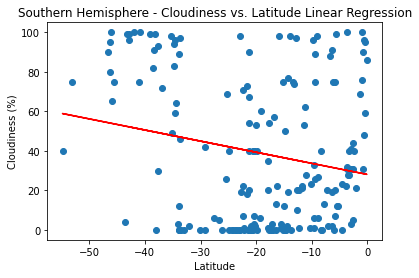

In [73]:
#create a Latutide vs Cloudiness scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sc_regress_values, "r-")
plt.savefig('south_cloud_regression.png')
plt.show()

In [74]:
# The linear regressions above show that there is a much stronger correlation between distance from the equator and cloudiness for cities in the Southern hemisphere
# than for cities in the Northern hemisphere.

In [75]:
#calculate linear regression for wind speed vs latitude for only Northern Hemisphere cities
nw_pearson = st.pearsonr(north_df["Lat"],north_df["Wind Speed"])
print(f"For Nothern Hemisphere Latitude vs Wind Speed the Pearson r value is {nw_pearson[0]} and the Pearson p value is {nw_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Wind Speed"])

nw_regress_values = (north_df["Lat"] * slope + intercept)

nw_regress_values

For Nothern Hemisphere Latitude vs Wind Speed the Pearson r value is -0.14155340321701018 and the Pearson p value is 0.006985844967602004


1      8.203217
5      9.037011
7      8.998282
10     7.302793
11     7.707973
         ...   
537    9.021369
539    8.204150
541    7.320152
542    7.371711
543    9.486377
Name: Lat, Length: 362, dtype: float64

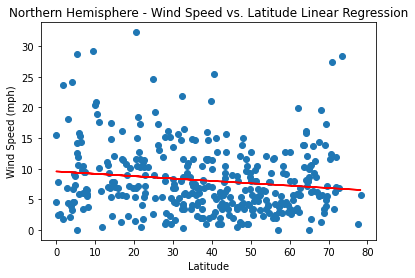

In [76]:
#create a Latutide vs Wind Speed scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nw_regress_values, "r-")
plt.savefig('north_wind_regression.png')
plt.show()

In [77]:
#calculate linear regression for cloudiness vs latitude for only Southern Hemisphere cities
sw_pearson = st.pearsonr(south_df["Lat"],south_df["Wind Speed"])
print(f"For Southern Hemisphere Latitude vs Wind Speed the Pearson r value is {sw_pearson[0]} and the Pearson p value is {sw_pearson[1]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Wind Speed"])

sw_regress_values = (south_df["Lat"] * slope + intercept)

sw_regress_values

For Southern Hemisphere Latitude vs Wind Speed the Pearson r value is -0.06846139516810688 and the Pearson p value is 0.3584570200646672


0       9.686244
2       8.736189
3       9.105727
4       9.553765
6      10.028609
         ...    
518     8.864475
519     8.457374
526     8.888882
538     8.639020
540     8.773423
Name: Lat, Length: 182, dtype: float64

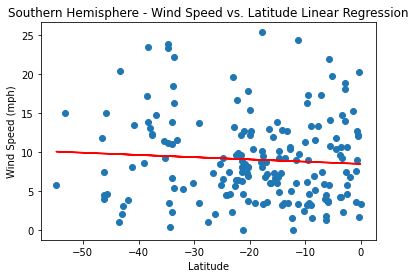

In [78]:
#create a Latutide vs Cloudiness scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sw_regress_values, "r-")
plt.savefig('south_wind_regression.png')
plt.show()

In [79]:
#The above linear regressions show little relationship between distance fromt the equator and a city's wind speed.